In [118]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [119]:
import pandas as pd

# Leer el archivo CSV en un DataFrame de pandas
df = pd.read_csv("/content/drive/MyDrive/new_train.csv")
test_df = pd.read_csv('/content/drive/MyDrive/new_test.csv')


In [120]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

In [121]:
# Seleccionar características (columnas) y variable objetivo
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex']
target = 'Survived'

X = df[features]
y = df[target]

In [122]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
# Crear y entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [124]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [125]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
# Crear y entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [127]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

Precisión del modelo: 0.82


In [128]:
# Mostrar la matriz de confusión y el informe de clasificación
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)
print('\nInforme de Clasificación:')
print(class_report)

Matriz de Confusión:
[[92 13]
 [20 54]]

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



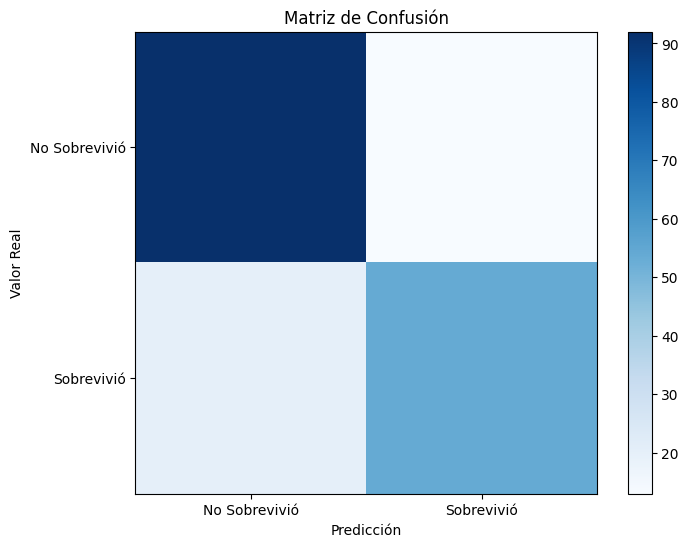

In [129]:
# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
plt.xticks([0, 1], ['No Sobrevivió', 'Sobrevivió'])
plt.yticks([0, 1], ['No Sobrevivió', 'Sobrevivió'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

In [130]:
le = LabelEncoder()
test_df['Sex'] = le.fit_transform(test_df['Sex'])

In [131]:
# Seleccionar las mismas características utilizadas para entrenar el modelo
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex']
X_test = test_df[features]

In [132]:
# Manejar los valores faltantes en el conjunto de prueba
imputer = SimpleImputer(strategy='median')  # Puedes cambiar 'median' a 'mean' u otra estrategia adecuada
X_test_imputed = imputer.fit_transform(X_test)

In [133]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_imputed)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [137]:
# Guardar las predicciones en un archivo CSV con los identificadores de pasajeros ('PassengerId') y si sobrevivio (1) o no (0)
predictions_df = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived_Predicted': y_pred})
predictions_df.to_csv('/content/drive/MyDrive/predictions.csv', index=False)